In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

## Data Pre-processing

In [9]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [10]:
print("X_train Shape : {}".format(X_train.shape))
print("X_test Shape : {}".format(X_test.shape))
print()
print("y_train Shape : {}".format(y_train.shape))
print("y_test Shape : {}".format(y_test.shape))

X_train Shape : (60000, 28, 28)
X_test Shape : (10000, 28, 28)

y_train Shape : (60000,)
y_test Shape : (10000,)


In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

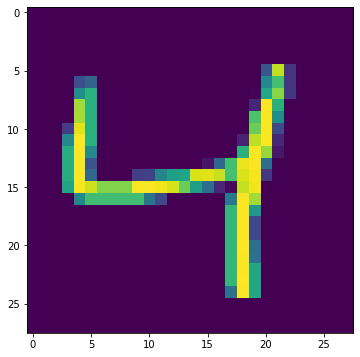

In [13]:
plt.figure(figsize = (10,6))
plt.imshow(X_train[2])
plt.show()

In [14]:
# Biz bu Değerleri 0 ile 1 arasında olmasını isteriz...

print("X_train Max Values : {}".format(np.max(X_train)))
print("X_train Min Values : {}".format(np.min(X_train)))

X_train Max Values : 255
X_train Min Values : 0


In [15]:
X_train = X_train / 255
X_test = X_test / 255

print("X_train Max Values : {}".format(np.max(X_train)))
print("X_train Min Values : {}".format(np.min(X_train)))

X_train Max Values : 1.0
X_train Min Values : 0.0


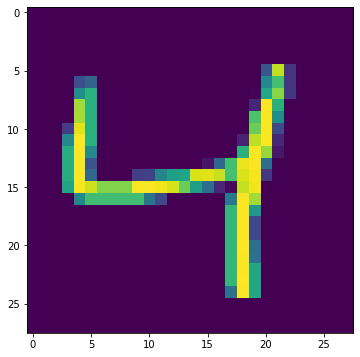

In [16]:
# 28 * 28 zaten !!

plt.figure(figsize = (10,6))
plt.imshow(X_train[2])
plt.show()

In [17]:
print("X_train Shape : {}".format(X_train.shape))
print("X_test Shape : {}".format(X_test.shape))
print()
print("y_train Shape : {}".format(y_train.shape))
print("y_test Shape : {}".format(y_test.shape))

X_train Shape : (60000, 28, 28)
X_test Shape : (10000, 28, 28)

y_train Shape : (60000,)
y_test Shape : (10000,)


In [18]:
# Biz bunları flatten uygulayacağız 

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
# Flatten Örneği !!!
a = np.array([[[1,3,4],[1,2,3],[1,2,3]]])

In [21]:
a.reshape(len(a),3*3)

array([[1, 3, 4, 1, 2, 3, 1, 2, 3]])

In [22]:
# Son kez Gözlemleyelim !!

print("X_train_flattened Shape : {}".format(X_train_flattened.shape))
print("X_test_flattened Shape : {}".format(X_test_flattened.shape))

X_train_flattened Shape : (60000, 784)
X_test_flattened Shape : (10000, 784)


## Model

In [23]:
model = Sequential()

model.add(Dense(10, input_shape = (X_train_flattened.shape[1],), activation = "sigmoid"))

model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [24]:
history = model.fit(X_train_flattened,y_train, epochs = 5, validation_data = (X_test_flattened,y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4713 - accuracy: 0.8764 - val_loss: 0.3161 - val_accuracy: 0.9126
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9160 - val_loss: 0.2808 - val_accuracy: 0.9215
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9209 - val_loss: 0.2714 - val_accuracy: 0.9243
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9226 - val_loss: 0.2724 - val_accuracy: 0.9251
Epoch 5/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.2661 - accuracy: 0.9254 - val_loss: 0.2667 - val_accuracy: 0.9260


In [48]:
def plot_history(history, epochs):

  plt.figure(figsize = (15,6))
  fontsize = 15
  plt.subplot(1,2,1)
  epochs_range=range(1,epochs+1)
  plt.plot(epochs_range, history.history["accuracy"],label = "Train")
  plt.plot(epochs_range, history.history["val_accuracy"], label = "Test")
  plt.legend(loc = "best")
  plt.title("Accuracy", fontsize = fontsize  )
  plt.xlabel(f"Epochs Range : {range(1,epochs)}" , fontsize = fontsize)
  plt.ylabel("Accuracy Score ", fontsize = fontsize )
 
  plt.subplot(1,2,2)
  epochs_range=range(1,epochs+1)
  plt.plot(epochs_range, history.history["loss"],label = "Train")
  plt.plot(epochs_range, history.history["val_loss"], label = "Test")
  plt.legend(loc = "best")
  plt.title("Loss", fontsize = fontsize  )
  plt.xlabel(f"Epochs Range : {range(1,epochs)}" , fontsize = fontsize)
  plt.ylabel("Loss Score ", fontsize = fontsize )
  
  plt.tight_layout()
  plt.show()

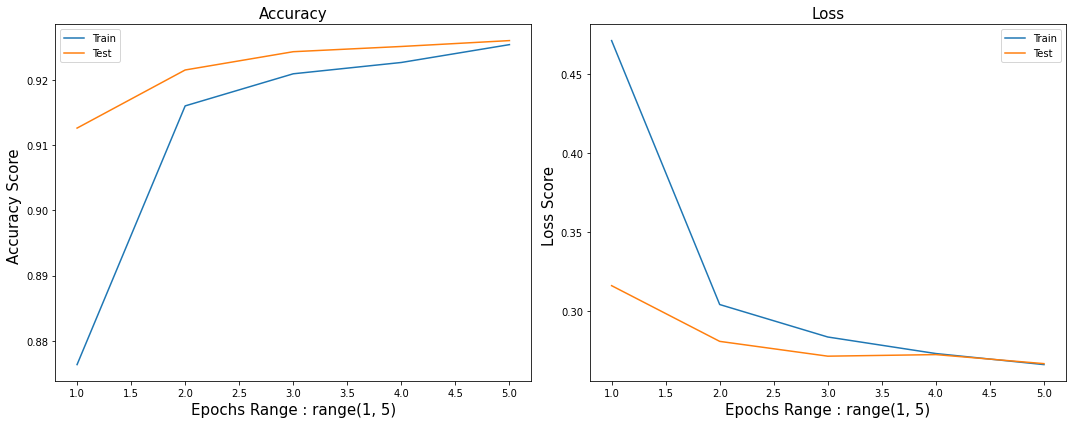

In [49]:
plot_history(history, 5)

In [51]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([2.31555700e-02, 3.29351650e-07, 5.10164499e-02, 9.68777180e-01,
       3.41114402e-03, 1.00233465e-01, 1.17061552e-06, 9.99713540e-01,
       9.68443751e-02, 7.08670735e-01], dtype=float32)

In [52]:
single_y_pred = np.argmax(y_pred, axis =1 )
single_y_pred[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [53]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

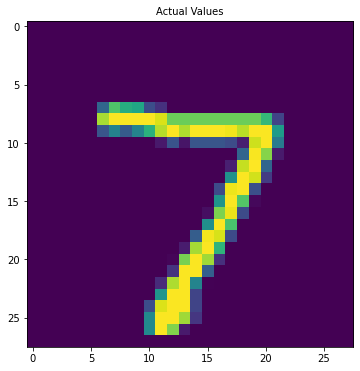

In [58]:
# Burda dikkat et flatten sokmakdık o eğitim için Dikkat Lütfen !!!

plt.figure(figsize = (10,6))
plt.imshow(X_test[0])
plt.title("Actual Values", fontsize = 10)
plt.show()

In [62]:
print("Predictions Values : {}".format(single_y_pred[0]))

Predictions Values : 7


In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [71]:
def confusion_matrix_graph(y_actual,y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  cm = confusion_matrix(y_actual,y_pred)

  plt.figure(figsize = (10,6))
  sns.heatmap(cm, fmt = "d",annot = True)
  plt.title("Confusion Matrix Graph")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

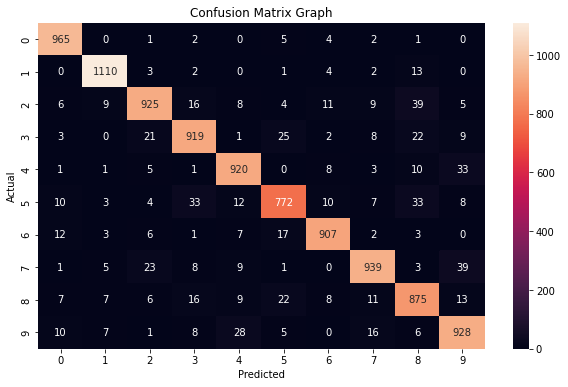

In [72]:
confusion_matrix_graph(y_test, single_y_pred)

# Using Hidden Layer

In [74]:
# Öncesinde Prediction Değerin uzunlu kadar layers oluşturduk !!!

model = Sequential()

model.add(Dense(100, input_shape = (X_train_flattened.shape[1],), activation="relu"))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_flattened, y_train, epochs = 5, validation_data=(X_test_flattened, y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6511 - accuracy: 0.8413 - val_loss: 0.3346 - val_accuracy: 0.9111
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.9141 - val_loss: 0.2676 - val_accuracy: 0.9254
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9283 - val_loss: 0.2336 - val_accuracy: 0.9316
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2230 - accuracy: 0.9376 - val_loss: 0.2054 - val_accuracy: 0.9421
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1982 - accuracy: 0.9449 - val_loss: 0.1858 - val_accuracy: 0.9475


In [77]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([2.9585868e-01, 3.1388104e-03, 7.7229005e-01, 9.7642374e-01,
       4.5445561e-03, 2.7556509e-01, 3.0000512e-05, 9.9993503e-01,
       2.7380827e-01, 6.4428836e-01], dtype=float32)

In [78]:
single_y_pred = [np.argmax(i) for i in y_pred]
single_y_pred[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

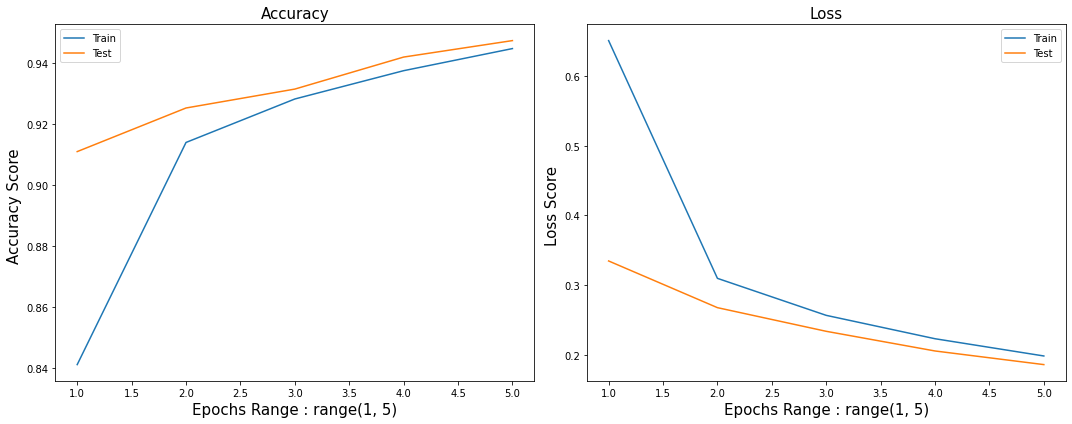

In [75]:
plot_history(history,5)

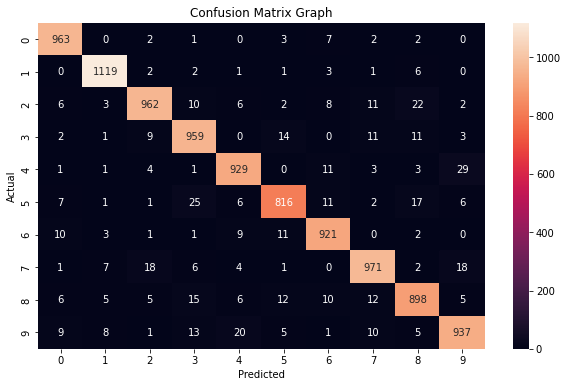

In [79]:
confusion_matrix_graph(y_test,single_y_pred)

# Using Flatten Layer So That We Don't Have To Call .reshape On Input Dataset

In [84]:
# Burda X_train_flatten kullanmadan yaptık !!!

model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(100, activation = "relu"))
model.add(Dense(10, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2713 - accuracy: 0.9236 - val_loss: 0.1585 - val_accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9637 - val_loss: 0.1015 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0872 - accuracy: 0.9737 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0850 - val_accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0518 - accuracy: 0.9838 - val_loss: 0.0816 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0811 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0822 - val_accuracy:

In [85]:
y_pred = model.predict(X_test)
y_pred[0]

array([1.6093254e-03, 4.7885369e-06, 8.3609343e-02, 9.6647233e-01,
       6.3412188e-07, 1.3455749e-04, 2.6933875e-10, 9.9999881e-01,
       4.1808993e-02, 5.1492167e-01], dtype=float32)

In [86]:
single_y_pred = [np.argmax(i) for i in y_pred]
single_y_pred[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [87]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

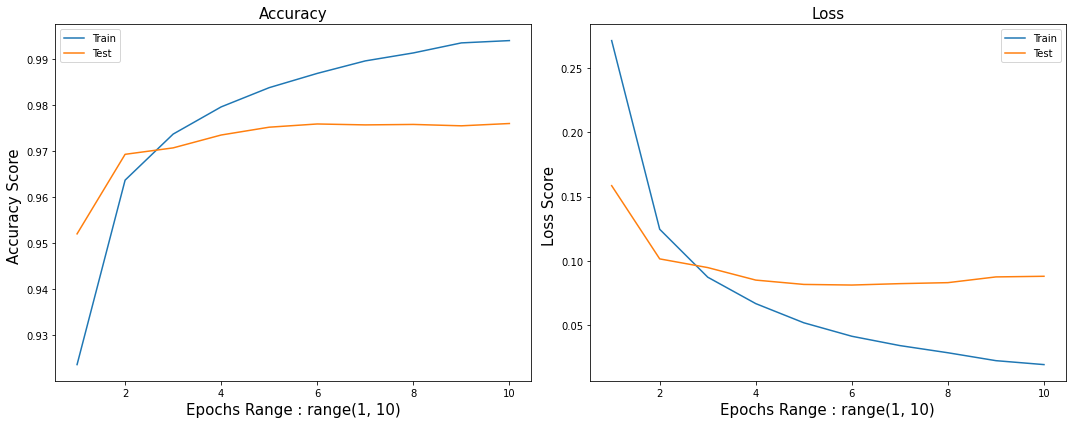

In [88]:
plot_history(history,10)

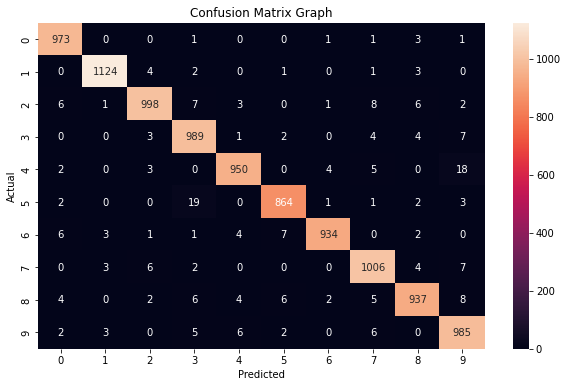

In [89]:
confusion_matrix_graph(y_test, single_y_pred)